In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,4)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm

## Bank Churn

In [171]:
bank_df = pd.read_csv('BANK.xls - Sheet1.csv',skiprows=2)

In [172]:
len(bank_df)

248

In [173]:
bank_df.drop(0,inplace=True)

In [174]:
bank_df.drop(bank_df.tail(2).index,inplace=True)

In [175]:
bank_df.columns

Index(['Unnamed: 0', 'O Loyal', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Pleasant Ambiance', 'Comfortable seating arrangement',
       'Immediate attenttion', 'Good Response on Phone',
       'Errors in Passbook entries', 'Time to issue cheque book',
       'Time to sanction loan', 'Time to clear outstation cheques',
       'Issue of clean currency notes', 'Facility to pay bills',
       'Distance to residence', 'Distance to workplace',
       'Courteous staff behaviour', 'Enough parking place'],
      dtype='object')

In [176]:
bank_df.rename(columns={'Unnamed: 0':'Sr. No','O Loyal':'Response','Unnamed: 2':'Branch','Unnamed: 3':'Occupation','Unnamed: 4':'Age','Unnamed: 5':'Gender'},inplace=True)

In [177]:
bank_df.set_index('Sr. No',inplace=True)

In [178]:
bank_df[bank_df.duplicated()]

,Response,Branch,Occupation,Age,Gender,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,Distance to residence,Distance to workplace,Courteous staff behaviour,Enough parking place
Sr. No,,,,,,,,,,,,,,,,,,,


##### Columns with non numeric values

In [179]:
cols_with_non_numeric = [i for i in bank_df.columns if all(bank_df[i].str.match('^-?\d')) == False]

In [180]:
cols_with_non_numeric

['Branch', 'Occupation', 'Gender']

In [181]:
bank_df.drop(bank_df[bank_df['Gender'].str.match('\d') == False].index,inplace=True)

In [182]:
bank_df.drop(bank_df[bank_df['Occupation'].str.match('\d') == False].index,inplace=True)

##### Columns with negative values for score

In [183]:
cols_with_neg_numeric = [i for i in bank_df.columns if len(bank_df[bank_df[i].str.match('^-\d') == False]) != len(bank_df)]

In [184]:
rows_with_non_response = list(np.where(np.any((bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0) == True,axis=1)))

In [185]:
len(bank_df[(bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0)])

65

##### Dropping rows with Non-response

In [186]:
bank_df.drop(bank_df[(bank_df[bank_df.columns.drop(['Branch'])].astype(int).values < 0)].index,inplace=True)

In [187]:
bank_df.reset_index(inplace=True)

In [188]:
bank_df.head()

,Sr. No,Response,Branch,Occupation,Age,Gender,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,Distance to residence,Distance to workplace,Courteous staff behaviour,Enough parking place
0,2,0,B1,1,5,1,10,8,8,6,10,8,9,6,8,6,8,7,10,10
1,3,0,B1,0,5,1,4,8,7,8,5,7,4,5,7,6,8,7,9,6
2,4,0,B1,6,4,2,4,6,6,8,6,4,4,5,6,6,9,6,9,5
3,5,0,B1,1,2,1,10,8,6,10,8,8,5,7,8,7,10,10,5,8
4,6,0,B1,2,3,1,7,8,6,7,8,7,7,7,6,7,8,7,8,7


bank_df = bank_df.astype('category')

In [189]:
bank_df = bank_df.drop(columns=['Branch']).join(pd.get_dummies(bank_df['Branch'],prefix='Branch',dtype=int))

In [190]:
bank_df = bank_df.astype(int)

In [191]:
cat_var_lst = ['Pleasant Ambiance',
       'Comfortable seating arrangement', 'Immediate attenttion',
       'Good Response on Phone', 'Errors in Passbook entries',
       'Time to issue cheque book', 'Time to sanction loan',
       'Time to clear outstation cheques', 'Issue of clean currency notes',
       'Facility to pay bills', 'Distance to residence',
       'Distance to workplace', 'Courteous staff behaviour',
       'Enough parking place']

In [192]:
for i in cat_var_lst:
    bank_df[i] = bank_df[i].astype('category')

In [193]:
occupation_mapper = {1:'Business',2:'Private Service',3:'Government Service',4:'Student',5:'Defence',6:'Housewife',7:'Professional',8:'Others'}

In [194]:
age_mapper = {1:'<20',2:'20-30',3:'30-40',4:'40-58',5:'>58'}

In [195]:
gender_mapper = {1:'Male',2:'Female'}

In [196]:
bank_df['Occupation'] = bank_df['Occupation'].map(occupation_mapper)

In [197]:
bank_df['Age'] = bank_df['Age'].map(age_mapper)

In [198]:
bank_df['Gender'] = bank_df['Gender'].map(gender_mapper)

In [140]:
bank_df = bank_df.drop(columns=['Occupation']).join(pd.get_dummies(bank_df['Occupation'],prefix='Occupation',dtype=int))

In [141]:
bank_df = bank_df.drop(columns=['Age']).join(pd.get_dummies(bank_df['Age'],prefix='Age',dtype=int))

In [142]:
bank_df = bank_df.drop(columns=['Gender']).join(pd.get_dummies(bank_df['Gender'],prefix='Gender',dtype=int))

In [143]:
bank_df.head()

,Sr. No,Response,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,...,Occupation_Housewife,Occupation_Private Service,Occupation_Student,Age_20-30,Age_30-40,Age_40-58,Age_<20,Age_>58,Gender_Female,Gender_Male
0,2,0,10,8,8,6,10,8,9,6,...,0,0,0,0,0,0,0,1,0,1
1,3,0,4,8,7,8,5,7,4,5,...,0,0,0,0,0,0,0,1,0,1
2,4,0,4,6,6,8,6,4,4,5,...,1,0,0,0,0,1,0,0,1,0
3,5,0,10,8,6,10,8,8,5,7,...,0,0,0,1,0,0,0,0,0,1
4,6,0,7,8,6,7,8,7,7,7,...,0,1,0,0,1,0,0,0,0,1


In [34]:
x_train, x_test, y_train, y_test = train_test_split(bank_df.drop(columns=['Sr. No','Response']),bank_df['Response'],test_size=0.4,random_state=42)

```python
model_log = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
```

In [35]:
model_log = LogisticRegression(solver='liblinear')

In [36]:
model_log = model_log.fit(x_train,y_train)

In [37]:
model_log

LogisticRegression(solver='liblinear')

In [38]:
train_pred = model_log.predict(x_train)

In [39]:
confusion_matrix(y_train,train_pred)

array([[101,   2],
       [ 11,   8]])

In [40]:
test_pred = model_log.predict(x_test)

In [41]:
confusion_matrix(y_test,test_pred)

array([[68,  5],
       [ 7,  2]])

In [42]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       0.29      0.22      0.25         9

    accuracy                           0.85        82
   macro avg       0.60      0.58      0.58        82
weighted avg       0.84      0.85      0.85        82



In [43]:
accuracy_score(y_test,test_pred)

0.8536585365853658

In [44]:
_

0.8536585365853658

In [45]:
model_log.coef_[0,1]

0.11756751262753118

In [50]:
coef_dict = {i:model_log.coef_[0,_] for _,i in enumerate(x_train)}

In [67]:
res_df = pd.DataFrame(coef_dict.keys(),index=list(range(0,len(coef_dict.keys()))))

In [70]:
res_df.iloc[2,0]

'Immediate attenttion'

In [81]:
res_df['Coef'] = res_df.iloc[:,0].apply(lambda x: [coef_dict[i] for i in coef_dict if i == x])

In [83]:
res_df['Coef']  = res_df['Coef'].apply(lambda x: x[0])

In [87]:
res_df['Abs Coef'] = np.abs(res_df['Coef'])

In [90]:
x_train.to_csv('Bank_Churn_trainingdata.csv')

In [91]:
y_train.to_csv('Bank_Churn_trainingdata_y.csv')

<Axes: xlabel='Branch', ylabel='count'>

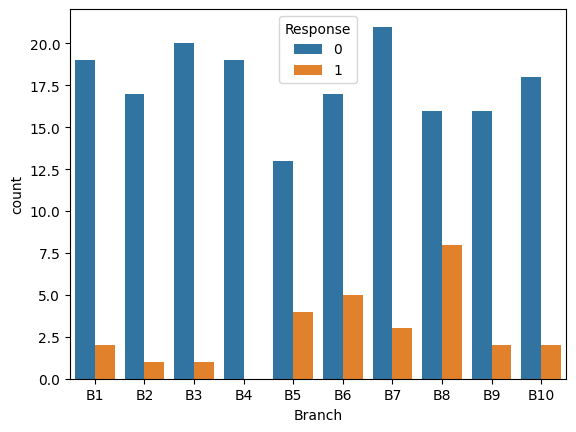

In [163]:
sns.countplot(bank_df,x='Branch',hue='Response')

<Axes: xlabel='Occupation', ylabel='count'>

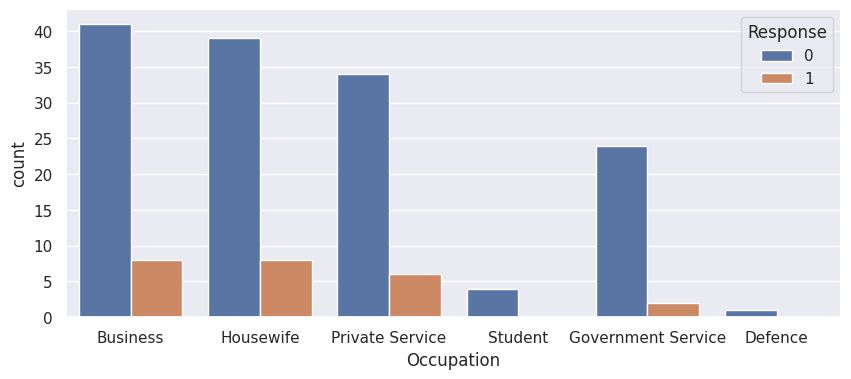

In [202]:
sns.countplot(bank_df,x='Occupation',hue='Response')

<Axes: xlabel='Age', ylabel='count'>

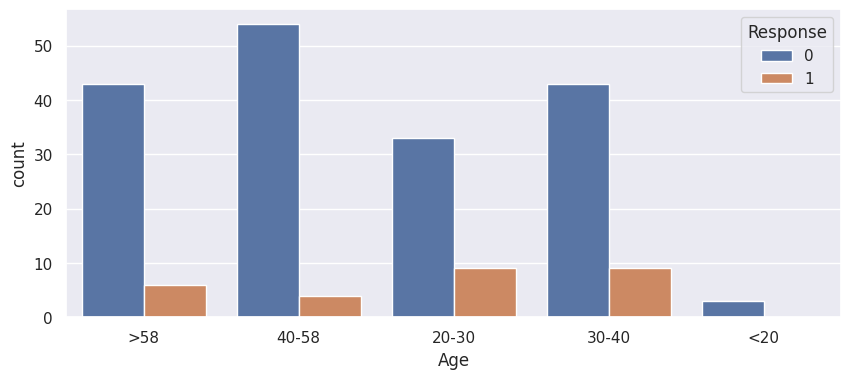

In [203]:
sns.countplot(bank_df,x='Age',hue='Response')

In [89]:
res_df.sort_values(by='Abs Coef',ascending=False)

,0,Coef,Abs value,Abs Coef
22,Branch_B8,1.090130,1.090130,1.090130
19,Branch_B5,0.910554,0.910554,0.910554
27,Occupation_Housewife,0.906734,0.906734,0.906734
15,Branch_B10,-0.831633,0.831633,0.831633
17,Branch_B3,-0.789670,0.789670,0.789670
20,Branch_B6,0.748354,0.748354,0.748354
24,Occupation_Business,0.735598,0.735598,0.735598
18,Branch_B4,-0.647102,0.647102,0.647102
30,Age_20-30,0.579889,0.579889,0.579889
34,Age_>58,-0.570507,0.570507,0.570507


In [58]:
pd.DataFrame(coef_dict,index=[0])

,Pleasant Ambiance,Comfortable seating arrangement,Immediate attenttion,Good Response on Phone,Errors in Passbook entries,Time to issue cheque book,Time to sanction loan,Time to clear outstation cheques,Issue of clean currency notes,Facility to pay bills,...,Occupation_Housewife,Occupation_Private Service,Occupation_Student,Age_20-30,Age_30-40,Age_40-58,Age_<20,Age_>58,Gender_Female,Gender_Male
0,0.116465,0.117568,-0.046496,-0.356343,0.02395,-0.21714,0.061583,0.104336,-0.313836,0.570187,...,0.906734,-0.242477,-0.220881,0.579889,0.477277,-0.028439,-0.096011,-0.570507,-0.04345,0.40566


In [47]:
resp_counts = bank_df['Response'].value_counts()

In [48]:
resp_counts.index

Index([0, 1], dtype='int64', name='Response')

Text(0.5, 1.0, 'Churn distribution in our dataset')

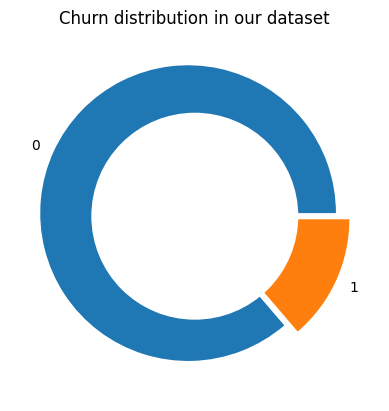

In [49]:
plt.pie(resp_counts.values,labels=resp_counts.index,pctdistance=0.85,explode=[0.05,0.05])
circ = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circ)
plt.title('Churn distribution in our dataset')